In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import src.triangulationCharuco as tri

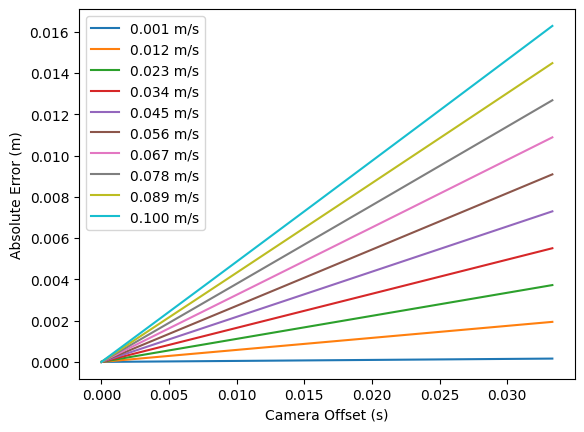

In [39]:
#load the pose data
poseData =  np.load('johnDebug.npz')
cam1Proj = poseData['cam1Pose']
cam2Proj = poseData['cam2Pose']

realPoint = np.array([0,0,0,1])
cam1Point = np.matmul(cam1Proj, realPoint)
cam1Point = cam1Point / cam1Point[2]
desyncs = np.linspace(0,0.0333333, 1000)
errs = np.zeros(len(desyncs))
vels = np.linspace(0.001, 0.1, 10)
for vel in vels:
    for i in range(len(desyncs)):
        point=  np.array([desyncs[i]*vel,0,0,1])
        cam2Point = np.matmul(cam2Proj, point)
        cam2Point = cam2Point / cam2Point[2]
        triangulated = cv2.triangulatePoints(cam1Proj, cam2Proj, cam1Point[:2], cam2Point[:2])
        triangulated = triangulated / triangulated[3]
        errs[i] = np.linalg.norm(triangulated[:3] - realPoint[:3])

    plt.plot(desyncs, errs, label="{:.3f} m/s".format(vel))
plt.legend()
plt.xlabel("Camera Offset (s)")
plt.ylabel("Absolute Error (m)")
plt.savefig("desync.png")
